In [1]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
from tensorflow.examples.tutorials.mnist import input_data
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import math as math

In [2]:
DATA_DIR = 'MNIST'
STEPS = 5000
MINIBATCH_SIZE = 100

imgDim = 28
imgChannels = 1
nClasses = 10

In [6]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

def conv_layer(input, shape):
    W = weight_variable(shape)
    b = bias_variable([shape[3]])
    return tf.nn.relu(conv2d(input, W) + b), W

def full_layer(input, size):
    in_size = int(input.get_shape()[1])
    W = weight_variable([in_size, size])
    b = bias_variable([size])
    return tf.matmul(input, W) + b

def display_images(images, size):
    n = len(images)
    plt.figure()
    plt.gca().set_axis_off()
    im = np.hstack([images[i] for i in range(size)])
    plt.title('True labels in images')
    plt.imshow(im)
    plt.show()
    
def display_custom1(custom_item):
    n_items = custom_item.shape[3]
    for i in range(n_items):
        plt.imshow(cv1[0,:,:,i],cmap = "gray")
        plt.show()

def display_filters(custom_item):
    print "Filters Input :", custom_item.shape
    plotNNFilter(custom_item)
    

        
def plotNNFilter(units):
    filters = units.shape[3]
    
    n_columns = 8
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.figure(i, figsize=(20,20))
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[:,:,1,i], interpolation="nearest", cmap="gray")


    
def display_filters(custom_item):
    #print "Filter Input :", custom_item.shape
    plotNNFilter(custom_item)
    
def plotNNFilter(units):
    filters = units.shape[3]
    fig = plt.figure(100, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    plt.axis('off')
    ax = fig.gca()
    ax.grid(False)
    for i in range(filters):
        #print "Unit shape :",units[:,:,:,i].shape
        disp_img = units[:,:,:,i].reshape((units.shape[0],units.shape[1]))
        #print "Disp_img shape :",disp_img.shape
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('L-1 Filter ' + str(i))
        plt.imshow(disp_img, interpolation="nearest", cmap="gray")
        
def display_filters_with_depth(custom_item):
    print "Filter Input :", custom_item.shape
    plotNNFilter_with_depth(custom_item)
    
def plotNNFilter_with_depth(units):
    filters = units.shape[3]
    plt.figure(200, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    plt.axis('off')
    for i in range(filters):
        depth = units.shape[2]
        for j in range(depth):
            #print "Unit shape :",units[:,:,:,i].shape
            disp_img = units[:,:,j,i].reshape((units.shape[0],units.shape[1]))
            #print "Disp_img shape :",disp_img.shape
            plt.subplot(n_rows, n_columns, i+1)
            plt.title('L-2 Filter ' + str(i))
            plt.imshow(disp_img, interpolation="nearest", cmap="gray")

def display_feature_map(custom_item, i):
    #print "Feature Map Input :", custom_item.shape
    plotNNFeatureMap(custom_item, i)
        
def plotNNFeatureMap(units, image_index):
    filters = units.shape[3]
    plt.figure(image_index, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        #print "Unit shape :",units[:,:,:,i].shape
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Feature Map ' + str(i))
        plt.imshow(units[image_index,:,:,i], interpolation="nearest", cmap="gray")

In [4]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
x_image = tf.reshape(x, [-1, 28, 28, 1])
shape1=[5, 5, 1, 32]
W1 = weight_variable(shape1)
conv1 = tf.nn.conv2d(x_image, W1, strides=[1, 1, 1, 1], padding='SAME')
conv1_pool = max_pool_2x2(conv1)
shape2 = [5, 5, 32, 64]
W2 = weight_variable(shape2)
conv2 = tf.nn.conv2d(conv1_pool, W2, strides=[1, 1, 1, 1], padding='SAME')
conv2_pool = max_pool_2x2(conv2)
conv2_flat = tf.reshape(conv2_pool, [-1, 7 * 7 * 64])
full_1 = tf.nn.relu(full_layer(conv2_flat, 1024))
keep_prob = tf.placeholder(tf.float32)
full1_drop = tf.nn.dropout(full_1, keep_prob=keep_prob)
y_conv = full_layer(full1_drop, 10)

Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.0
test accuracy: 0.0335999988019
Filter Input : (5, 5, 32, 64)
Predicted Labels: [5 2 5 2 1 5 5 3 5]


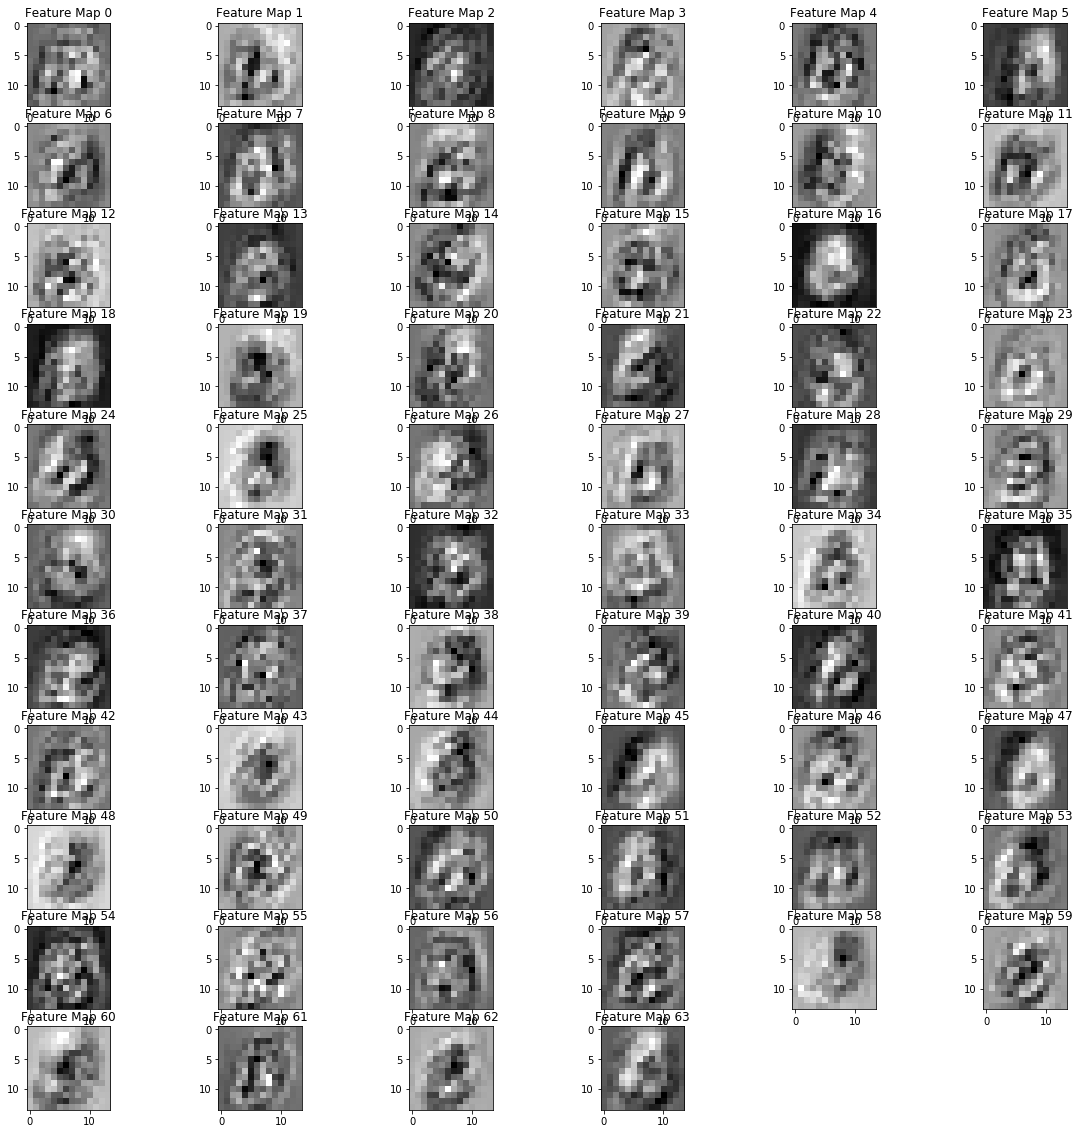

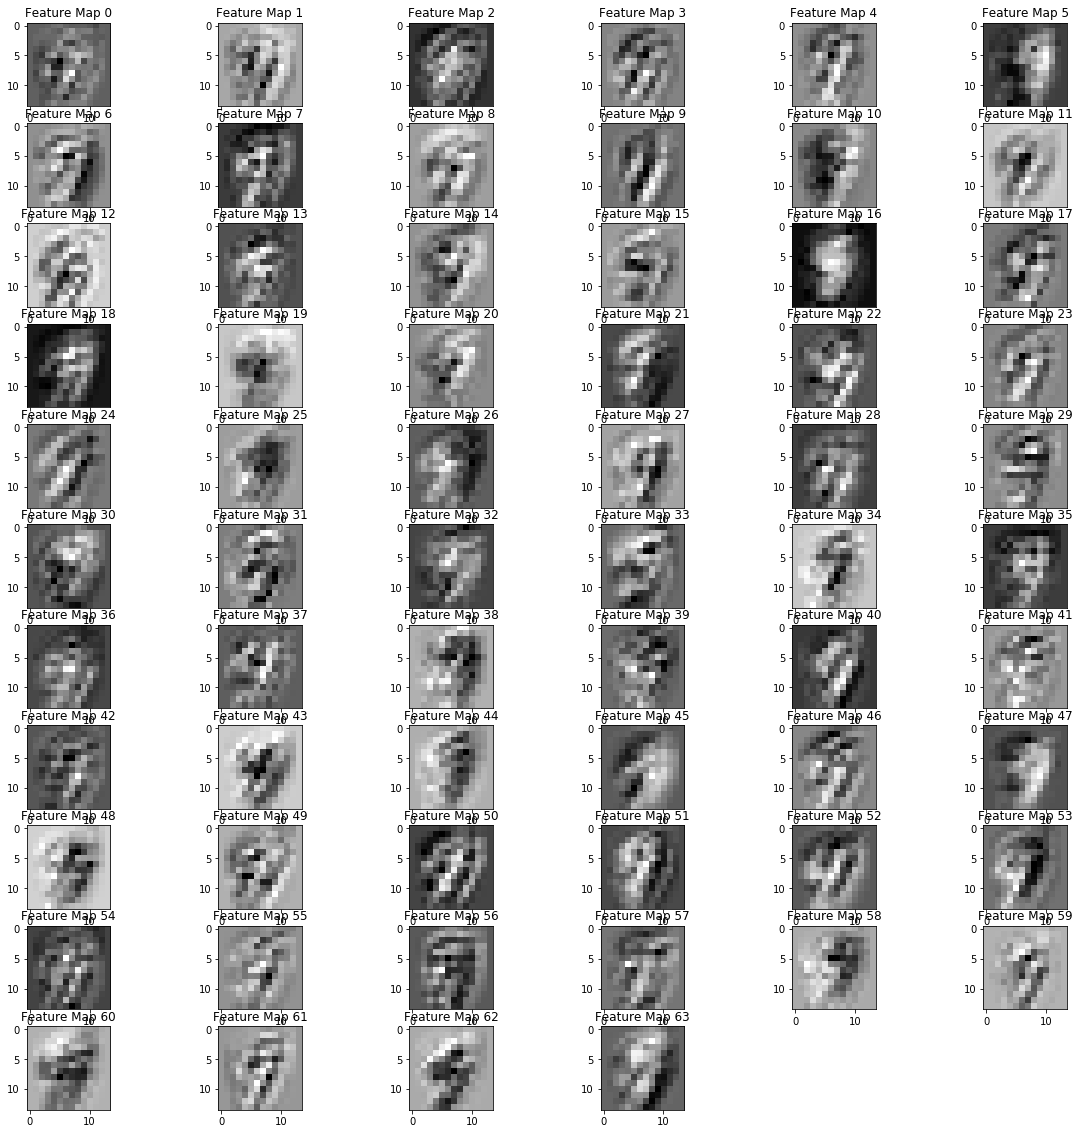

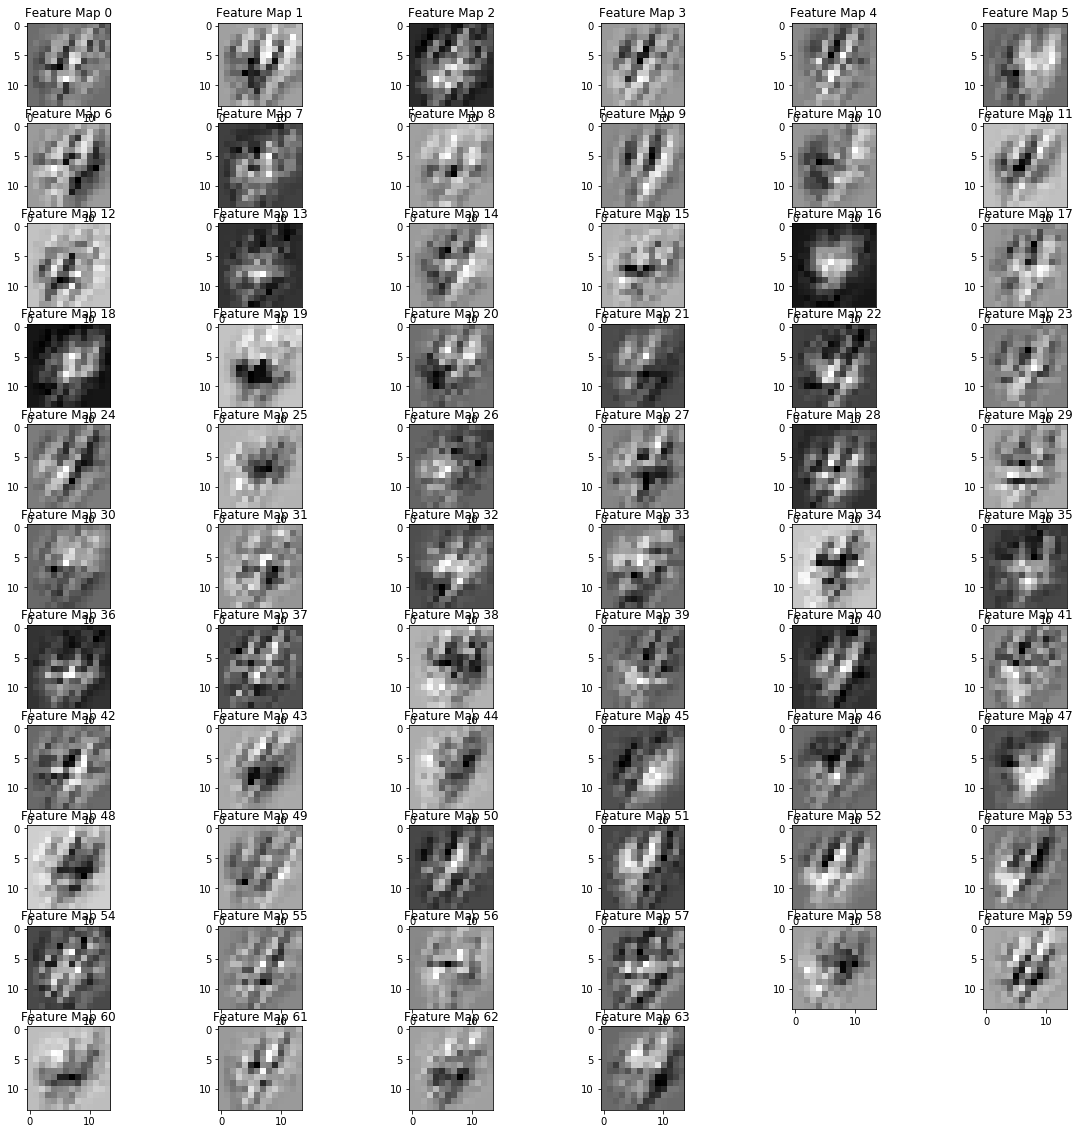

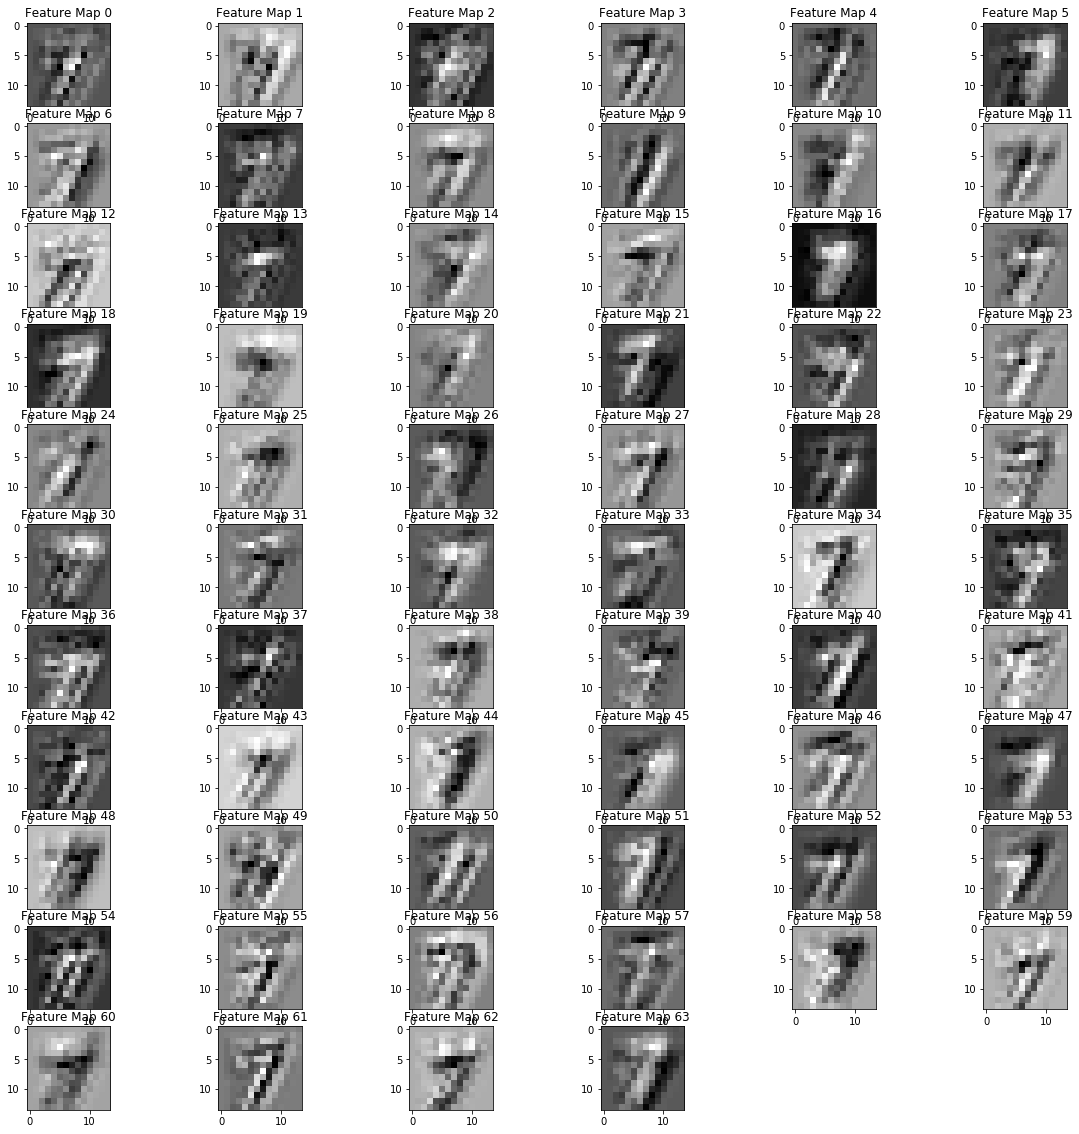

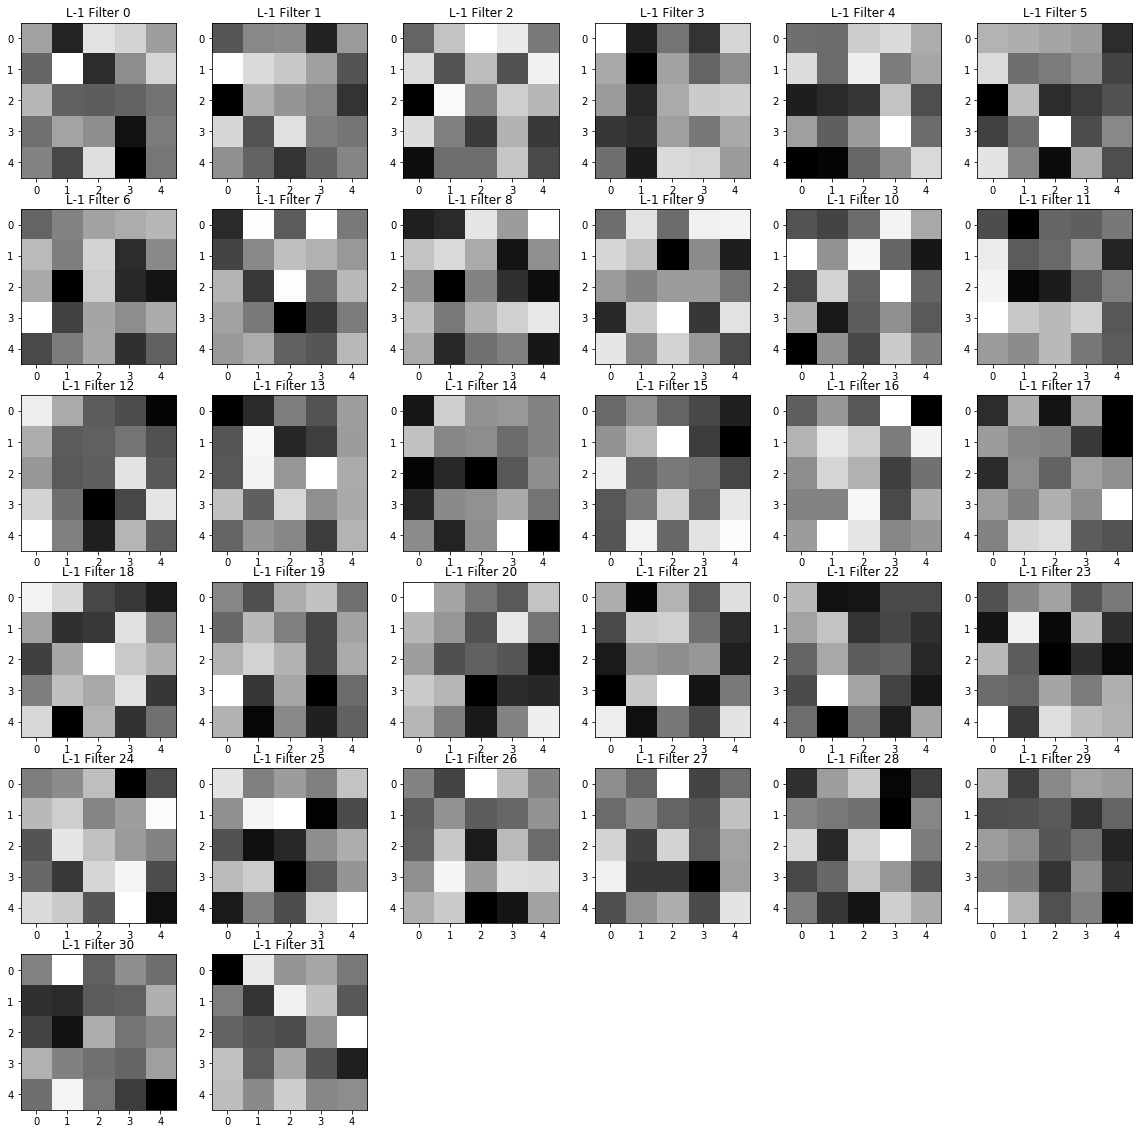

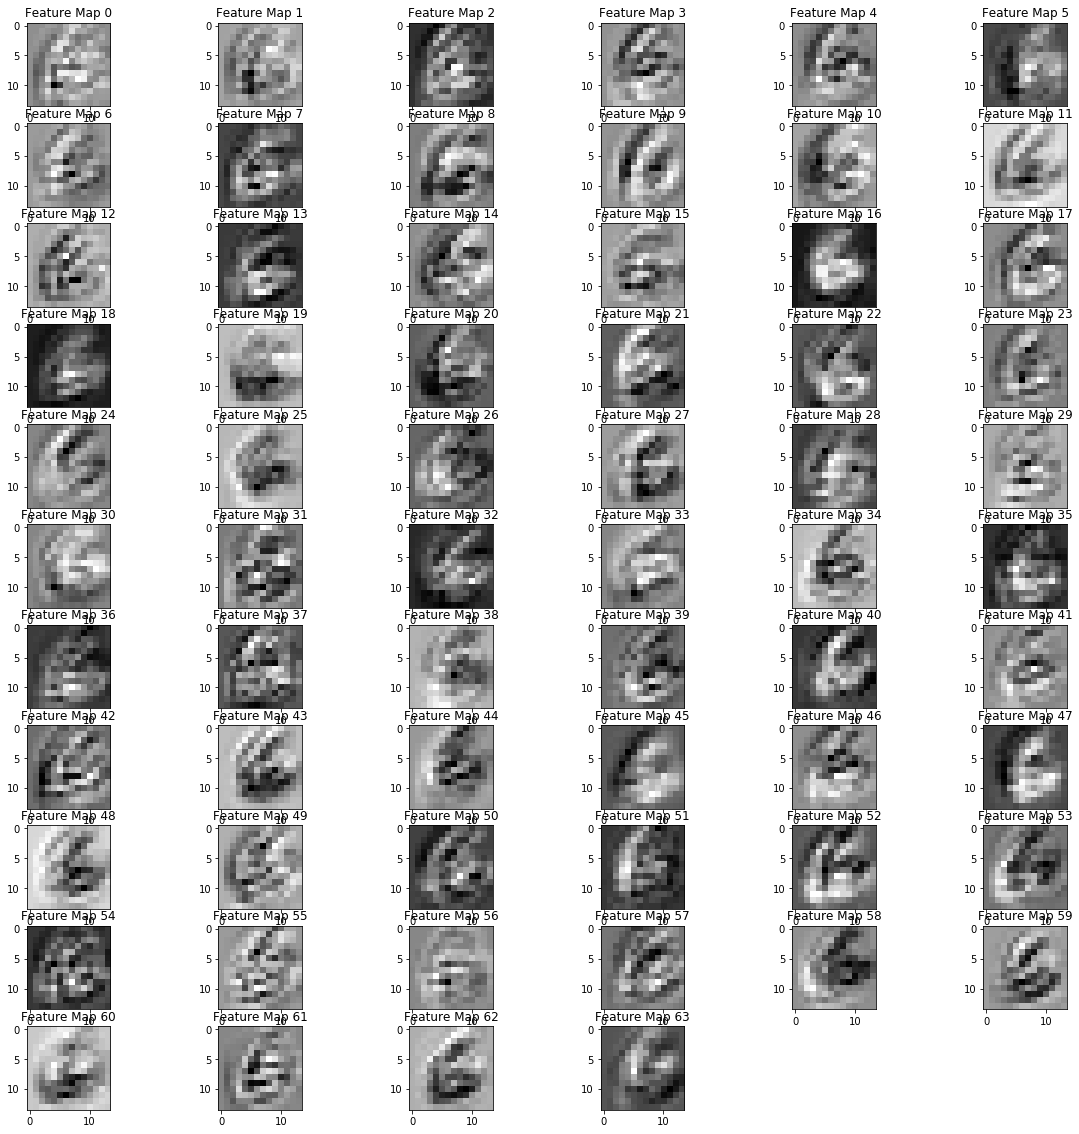

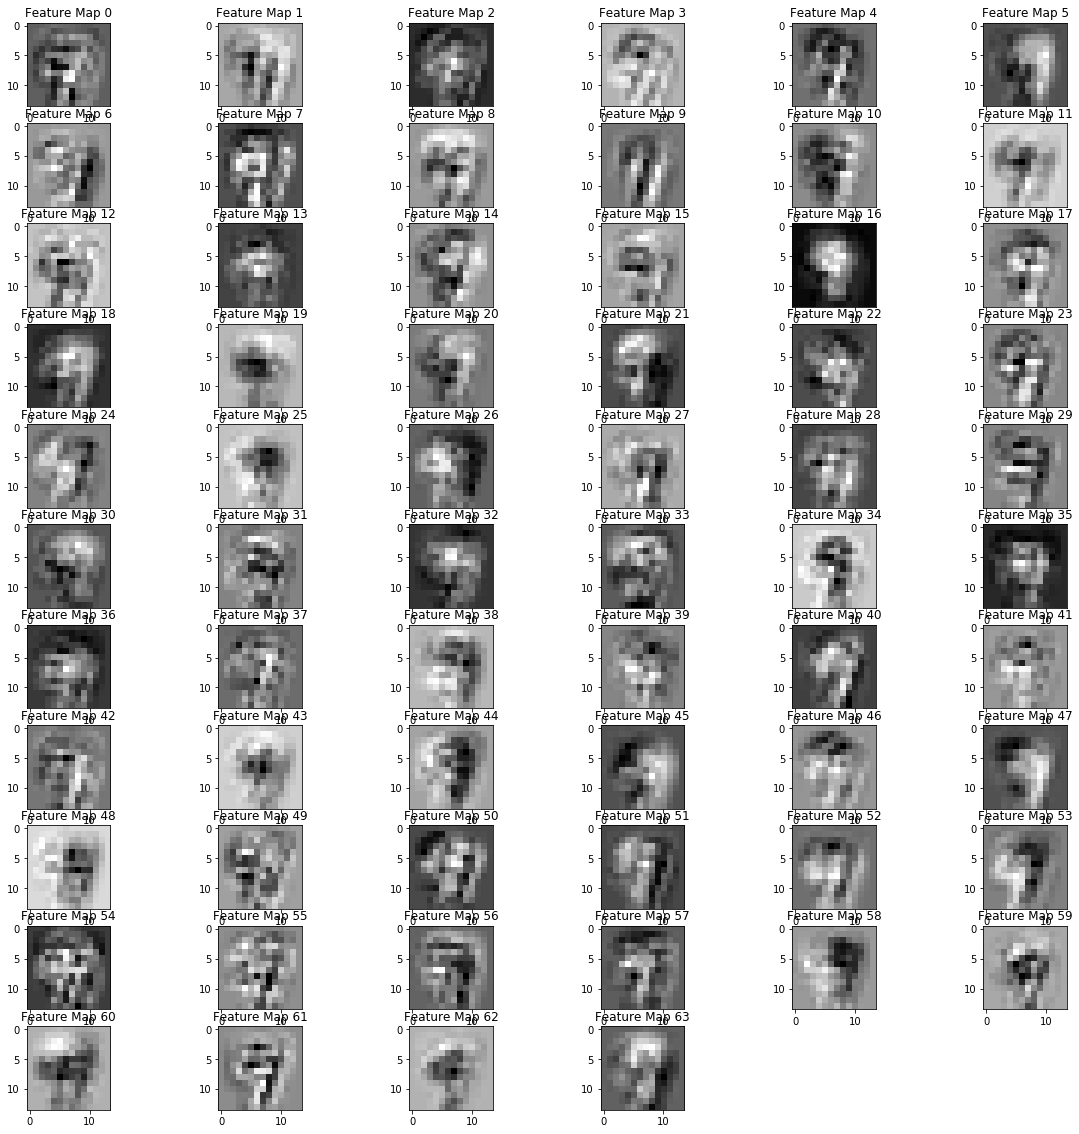

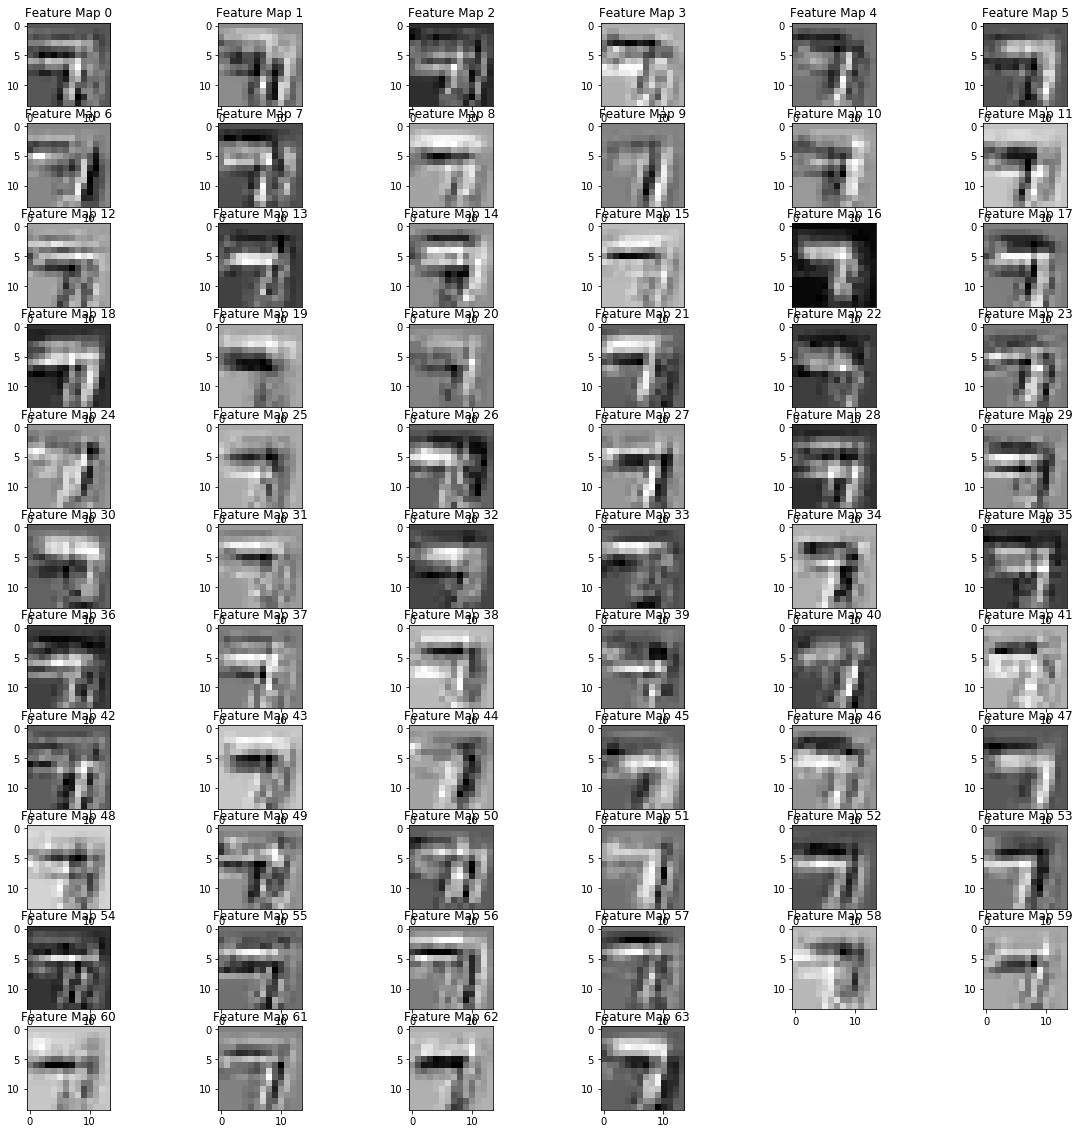

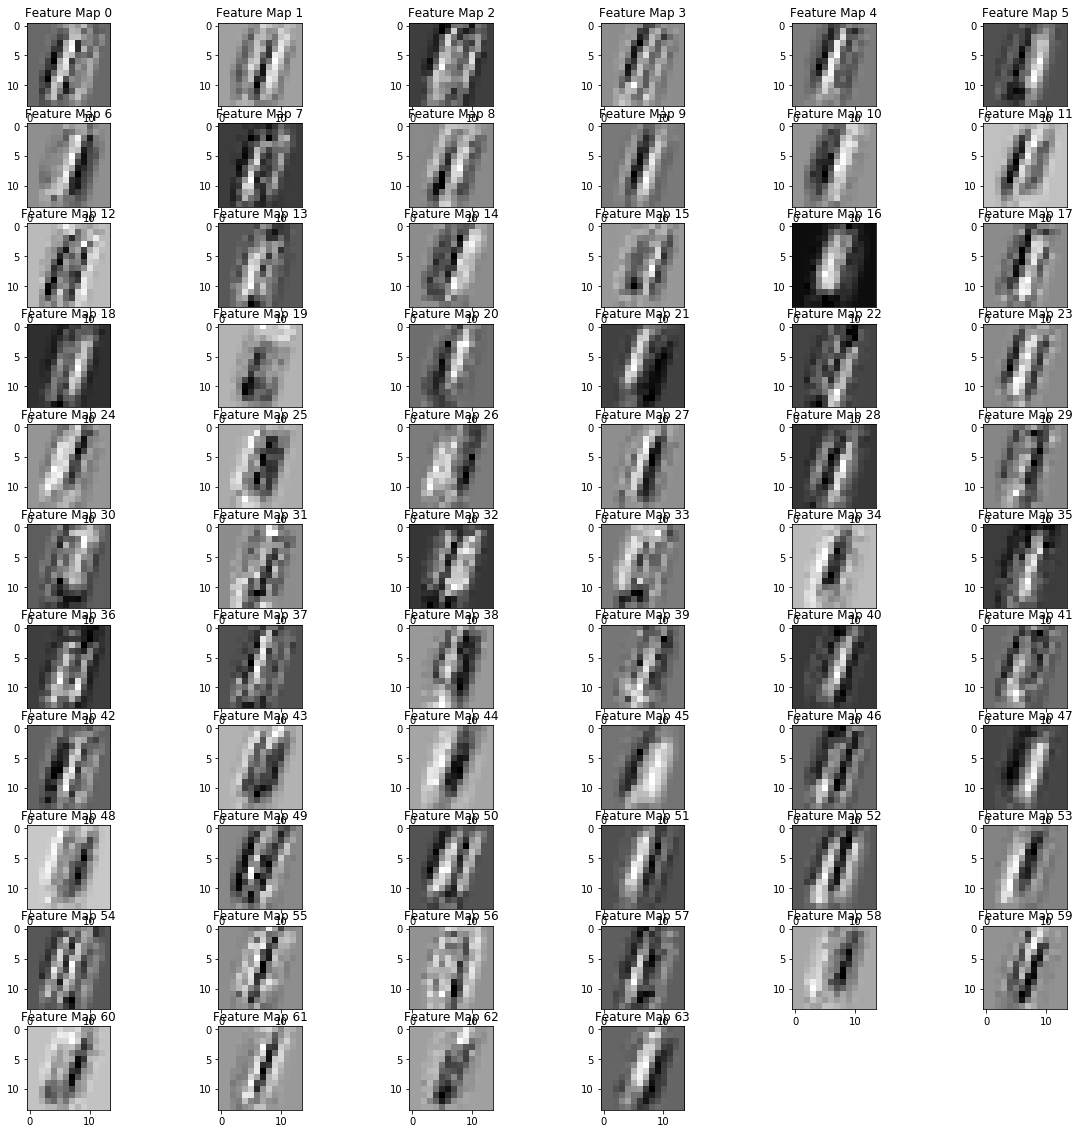

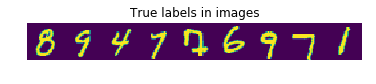

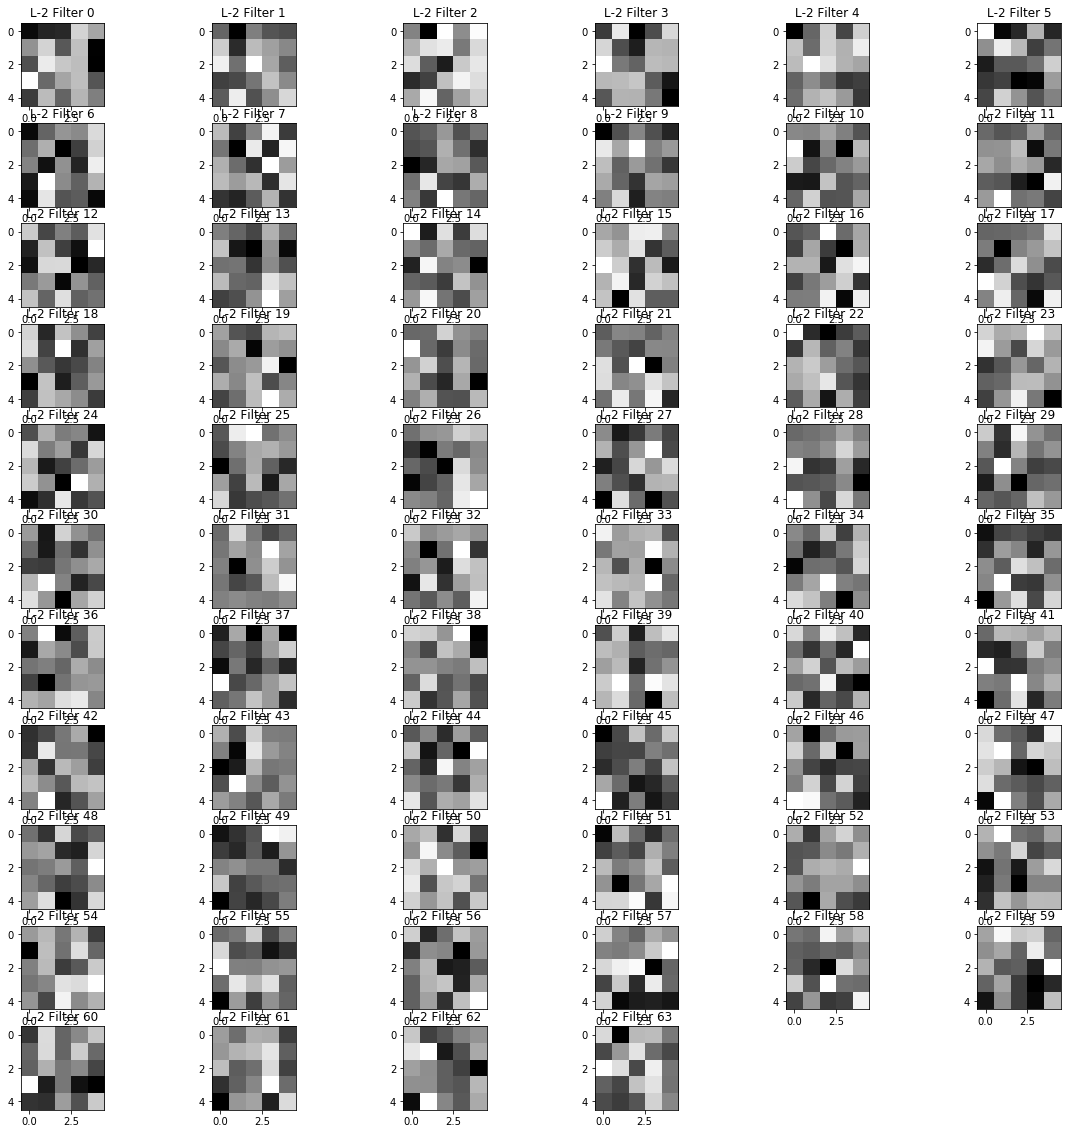

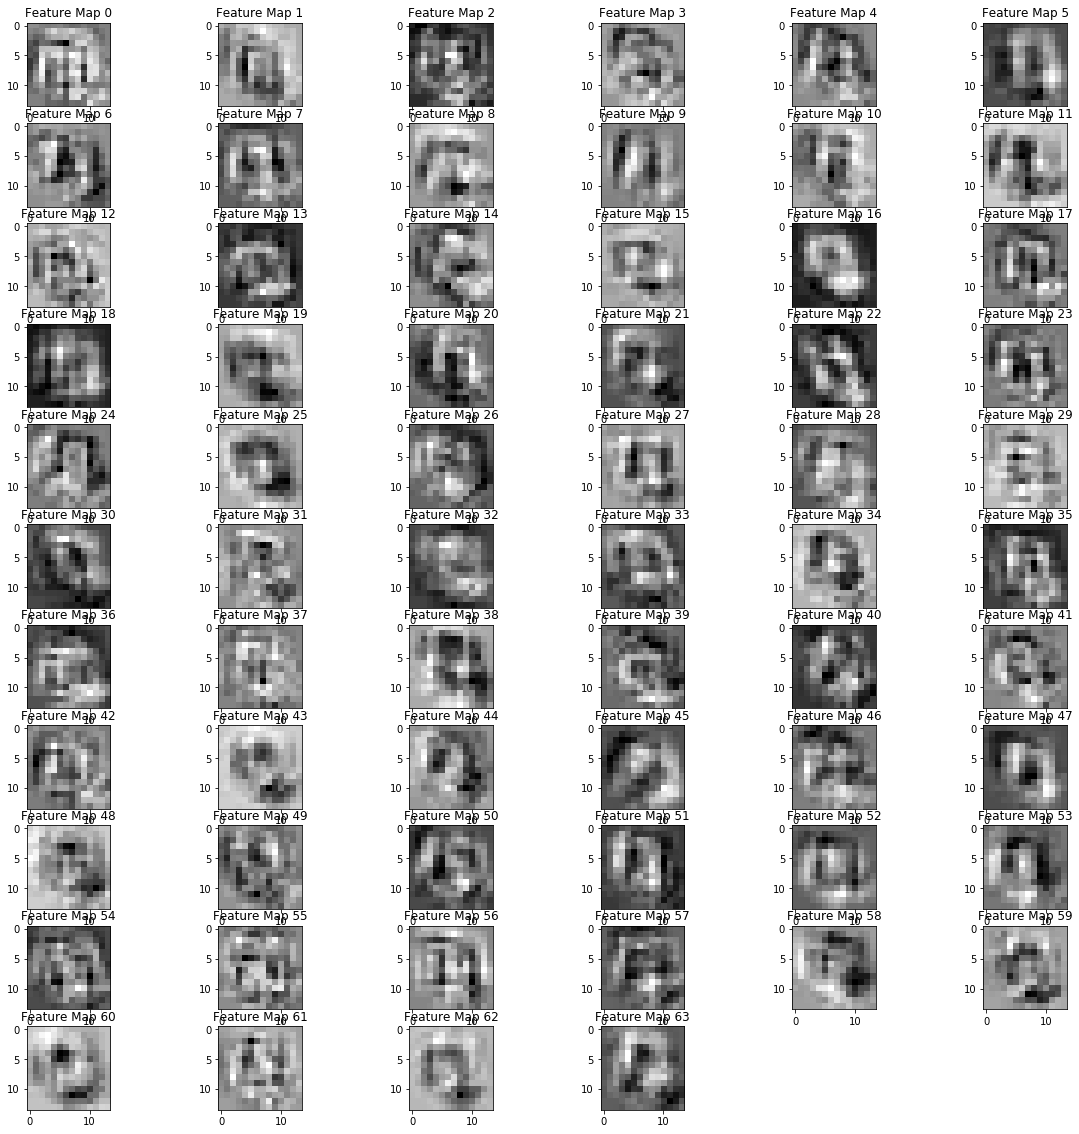

In [7]:
STEPS = 2  #Ideal value 2000
MINIBATCH_SIZE = 5 #Ideal value 400

mnist = input_data.read_data_sets(DATA_DIR, one_hot=True)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv,labels= y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(STEPS):
        batch = mnist.train.next_batch(MINIBATCH_SIZE)
        if i % 100 == 0:
            train_accuracy = sess.run(accuracy, feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
            print "step {}, training accuracy {}".format(i, train_accuracy)
            sess.run(train_step, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
            X = mnist.test.images.reshape(10, 1000, 784)
            Y = mnist.test.labels.reshape(10, 1000, 10)
            test_accuracy = np.mean([sess.run(accuracy,feed_dict = {x: X[i], y_: Y[i],keep_prob: 1.0})
                                      for i in range(10)])
    print "test accuracy: {}".format(test_accuracy)
    render_batch = mnist.test.next_batch(9)
    images = render_batch[0].reshape(9,28,28)
    filters1 = sess.run(W1,feed_dict = {x: render_batch[0]})
    display_filters(np.array(filters1))
    cv1 = sess.run(conv1,feed_dict = {x: render_batch[0]})
    for i in range(np.array(cv1).shape[0]):
        display_feature_map(np.array(cv1),i)
    filters2 = sess.run(W2,feed_dict = {x: render_batch[0]})
    display_filters_with_depth(np.array(filters2))
    cv2 = sess.run(conv2,feed_dict = {x: render_batch[0]})
    for i in range(np.array(cv2).shape[0]):
        display_feature_map(np.array(cv2),i)
    
    labs = sess.run(tf.argmax(y_conv, 1),feed_dict = {x: render_batch[0], y_: render_batch[1],keep_prob: 1.0})
    print "Predicted Labels:", labs
    display_images(images,9)

In [ ]:
display_custom(np.array(W1),0)
print cv1.shape

In [ ]:
g = tf.get_default_graph()
g.collections
print g.get_tensor_by_name('conv1:0')
